<a href="https://colab.research.google.com/github/iamabhinav13/ClimateChange/blob/main/Climate_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Climate Data

In [2]:
import pandas as pd

# Replace 'file_path.csv' with the path to your CSV file
file_path = '/content/GlobalLandTemperaturesByCountry.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data import
print(data.head())


           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland


### Checking basic information in the Data

In [3]:
# Check basic information about the DataFrame
print(data.info())

# Display the data types of each column
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB
None
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object


### Handling missing values

In [4]:
# Count missing values in each column
print(data.isnull().sum())
data1 = data.dropna()
data1.head()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


###  Converting Date Column to DateTime Object

In [5]:
# Convert 'dt' column to datetime format
data1['dt'] = pd.to_datetime(data1['dt'])
data1.head()

<ipython-input-5-cc7cdfd86ada>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['dt'] = pd.to_datetime(data1['dt'])


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


### Data Visualization

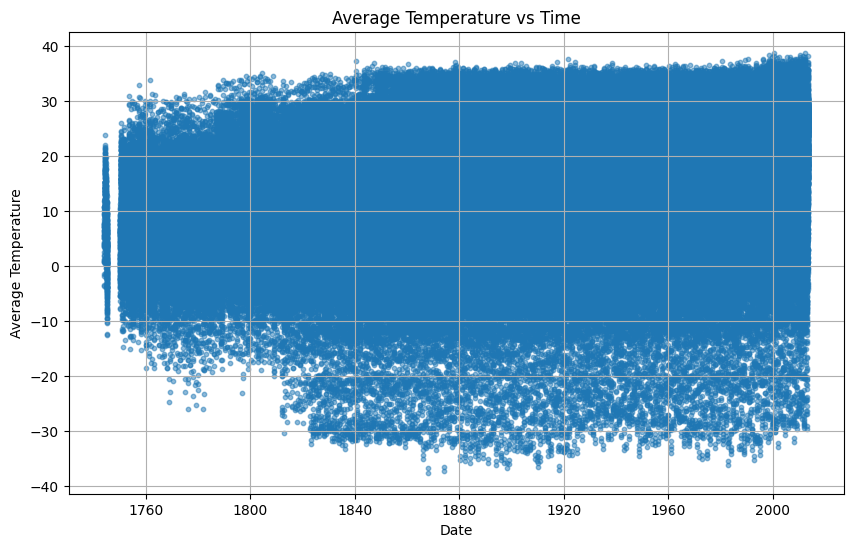

In [6]:
import matplotlib.pyplot as plt

# Create a scatter plot of Average Temperature vs Time
plt.figure(figsize=(10, 6))
plt.scatter(data1['dt'], data1['AverageTemperature'], s=10, alpha=0.5)
plt.title('Average Temperature vs Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

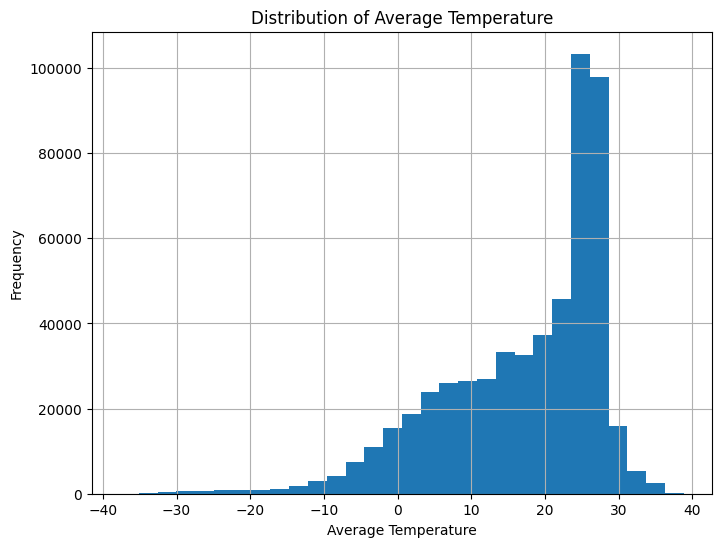

In [7]:
# Histogram of Average Temperature
plt.figure(figsize=(8, 6))
plt.hist(data1['AverageTemperature'].dropna(), bins=30)
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

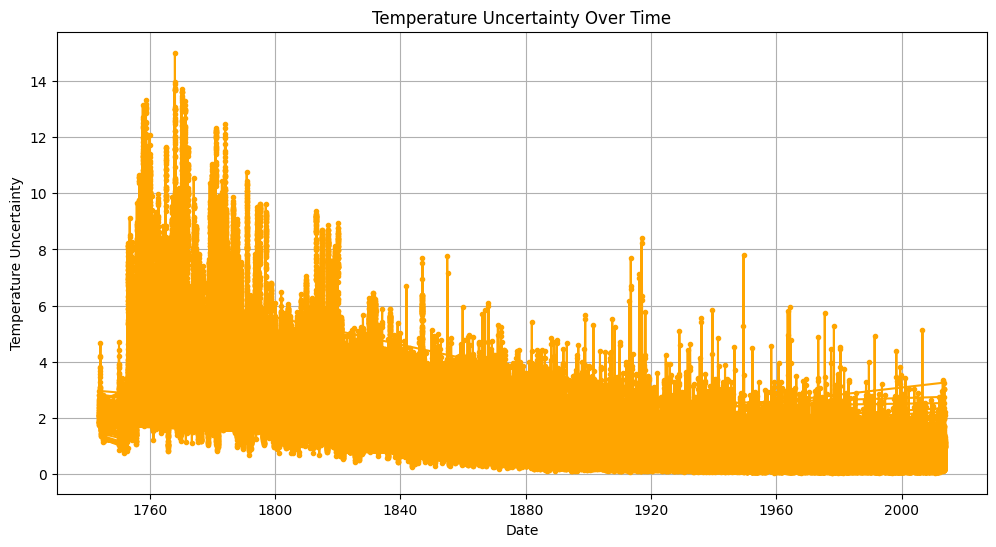

In [8]:
# Temperature Uncertainty Over Time
plt.figure(figsize=(12, 6))
plt.plot(data1['dt'], data1['AverageTemperatureUncertainty'], linestyle='-', marker='o', markersize=3, color='orange')
plt.title('Temperature Uncertainty Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature Uncertainty')
plt.grid(True)
plt.show()

<ipython-input-9-163fb2fac20b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data1.corr()


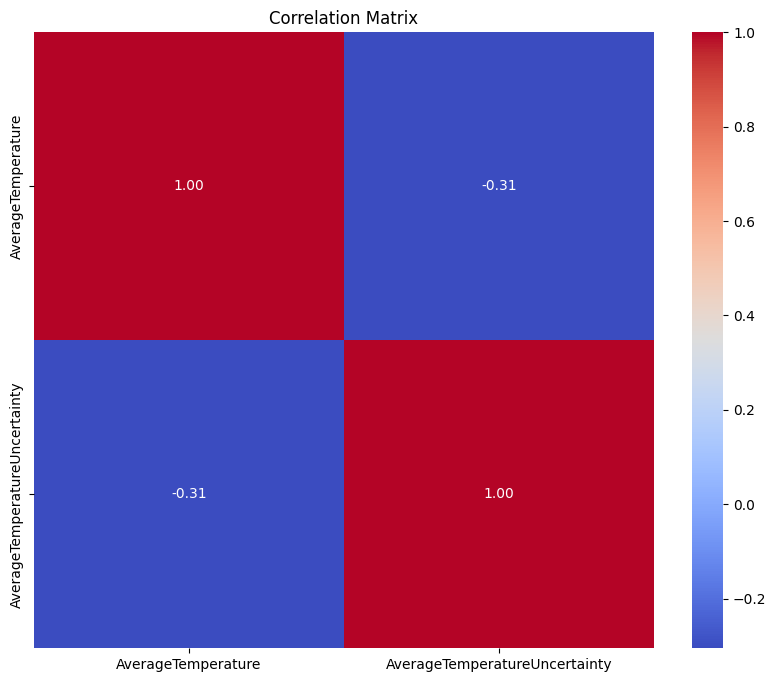

In [9]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = data1.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<ipython-input-10-38444a8c30d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Month'] = data1['dt'].dt.month


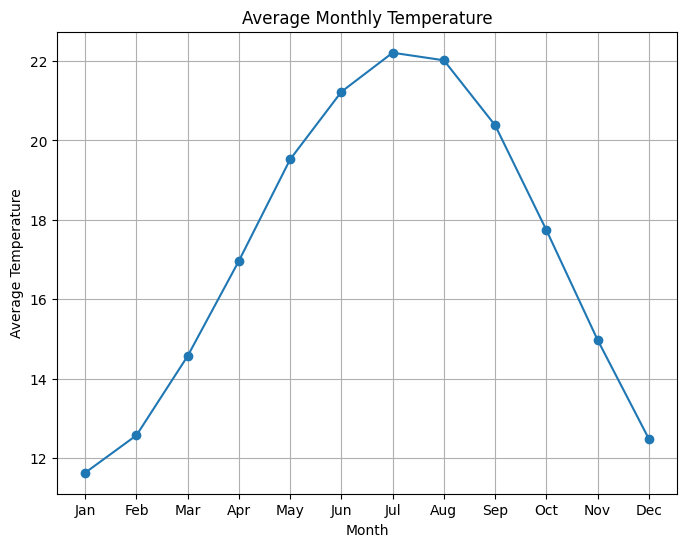

In [10]:
# Average Monthly Temperature
data1['Month'] = data1['dt'].dt.month
monthly_avg_temp = data1.groupby('Month')['AverageTemperature'].mean()

plt.figure(figsize=(8, 6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Summary Statistics

In [11]:
# Summary statistics for numerical columns
print(data1.describe())

       AverageTemperature  AverageTemperatureUncertainty          Month
count       544811.000000                  544811.000000  544811.000000
mean            17.193354                       1.019190       6.491932
std             10.953966                       1.202634       3.451034
min            -37.658000                       0.052000       1.000000
25%             10.025000                       0.323000       3.000000
50%             20.901000                       0.571000       6.000000
75%             25.814000                       1.207000       9.000000
max             38.842000                      15.003000      12.000000


### Country-wise Analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2508 entries, 243695 to 246306
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2508 non-null   datetime64[ns]
 1   AverageTemperature             2508 non-null   float64       
 2   AverageTemperatureUncertainty  2508 non-null   float64       
 3   Country                        2508 non-null   object        
 4   Month                          2508 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 117.6+ KB
None


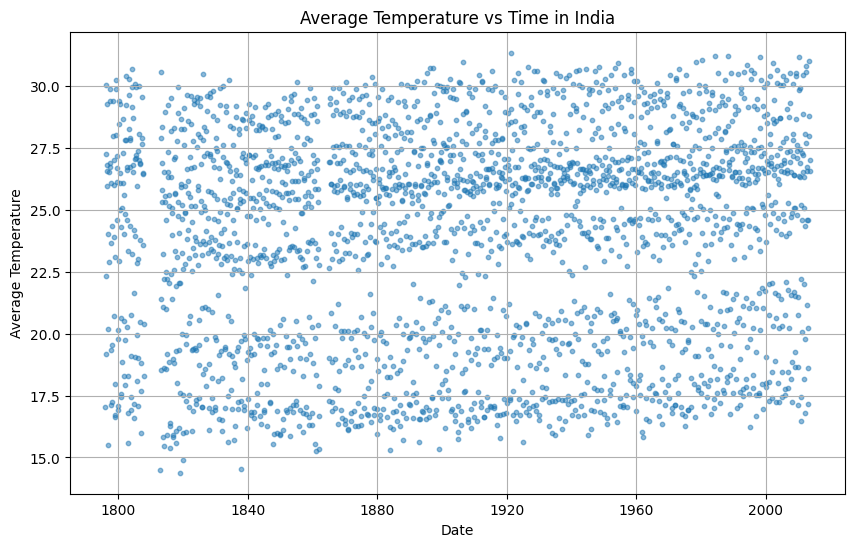

In [12]:
# Filter data for rows where the 'Country' column is 'India'
india_data = data1[data1['Country'] == 'India']

# Display basic information about the India-specific dataset
print(india_data.info())

# Create a scatter plot of Average Temperature vs Time for India
plt.figure(figsize=(10, 6))
plt.scatter(india_data['dt'], india_data['AverageTemperature'], s=10, alpha=0.5)
plt.title('Average Temperature vs Time in India')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

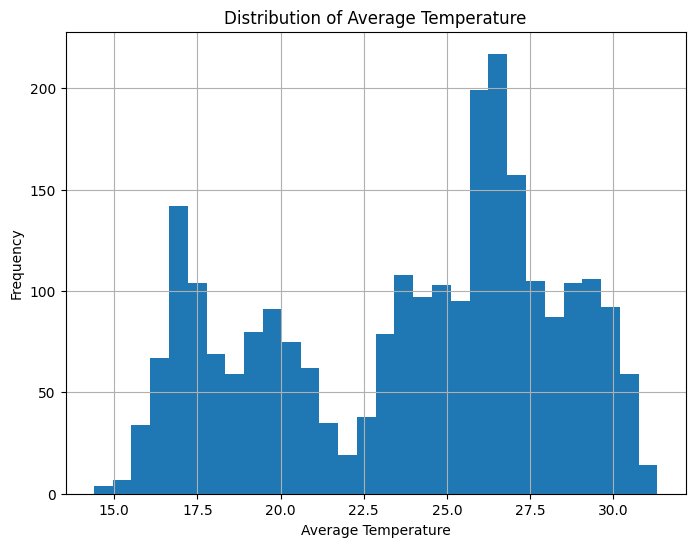

In [13]:
# Histogram of Average Temperature for India
plt.figure(figsize=(8, 6))
plt.hist(india_data['AverageTemperature'].dropna(), bins=30)
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Predictive Model

#### Linear Regression Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing values in 'AverageTemperature' column for simplicity
data_cleaned = data.dropna(subset=['AverageTemperature'])

# Features and Target
X = data_cleaned[['AverageTemperatureUncertainty']]  # Using uncertainty as a feature
y = data_cleaned['AverageTemperature']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 109.20748251120634
R-squared: 0.0922054153158609


#### Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest Mean Squared Error: 108.42795400773215
Random Forest R-squared: 0.09868529872484055


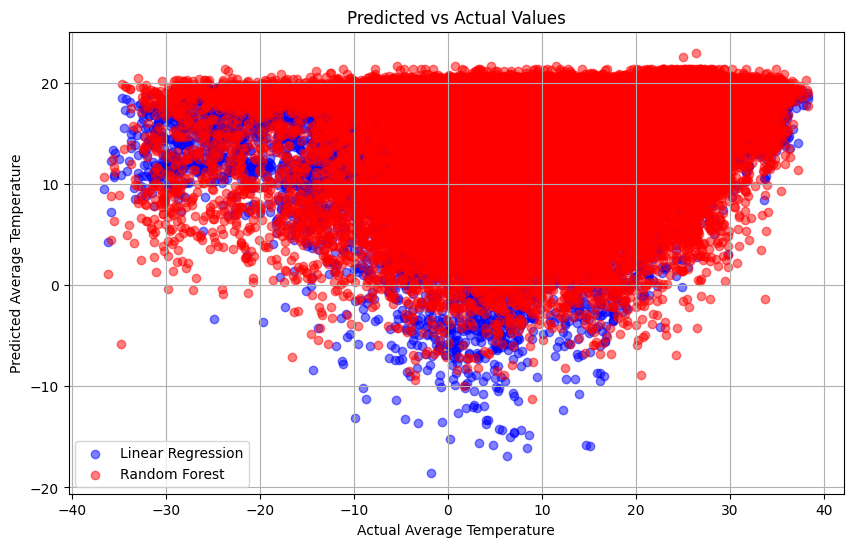

In [22]:
plt.figure(figsize=(10, 6))

# Linear Regression
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Linear Regression')

# Random Forest
plt.scatter(y_test, y_pred_rf, color='red', alpha=0.5, label='Random Forest')

# Add labels and title
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Average Temperature')
plt.ylabel('Predicted Average Temperature')
plt.legend()
plt.grid(True)
plt.show()


#### LSTM Model

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Data preparation
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_cleaned[['AverageTemperature', 'AverageTemperatureUncertainty']])
n_steps = 100  # Define the number of time steps

# Create sequences for LSTM
X_lstm, y_lstm = [], []
for i in range(n_steps, len(scaled_data)):
    X_lstm.append(scaled_data[i - n_steps:i, :])
    y_lstm.append(scaled_data[i, 0])  # Predicting 'AverageTemperature'

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Train-test split
split = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm), verbose=1)

# Evaluate the LSTM model
loss = model_lstm.evaluate(X_test_lstm, y_test_lstm)
print(f"LSTM Test Loss: {loss}")


Epoch 1/10
13618/13618 [==============================] - 232s 17ms/step - loss: 0.0021 - val_loss: 3.7817e-04
Epoch 2/10
13618/13618 [==============================] - 222s 16ms/step - loss: 5.9605e-04 - val_loss: 3.4812e-04
Epoch 3/10
13618/13618 [==============================] - 224s 16ms/step - loss: 5.4314e-04 - val_loss: 3.9957e-04
Epoch 4/10
13618/13618 [==============================] - 223s 16ms/step - loss: 5.1846e-04 - val_loss: 3.8310e-04
Epoch 5/10
13618/13618 [==============================] - 227s 17ms/step - loss: 5.0554e-04 - val_loss: 4.1714e-04
Epoch 6/10
13618/13618 [==============================] - 226s 17ms/step - loss: 4.9147e-04 - val_loss: 3.2340e-04
Epoch 7/10
13618/13618 [==============================] - 224s 16ms/step - loss: 4.7967e-04 - val_loss: 3.7693e-04
Epoch 8/10
13618/13618 [==============================] - 222s 16ms/step - loss: 4.6444e-04 - val_loss: 3.3316e-04
Epoch 9/10
13618/13618 [==============================] - 225s 17ms/step - loss: 4.5

3405/3405 [==============================] - 28s 8ms/step
LSTM R-squared: 0.9810268038594753


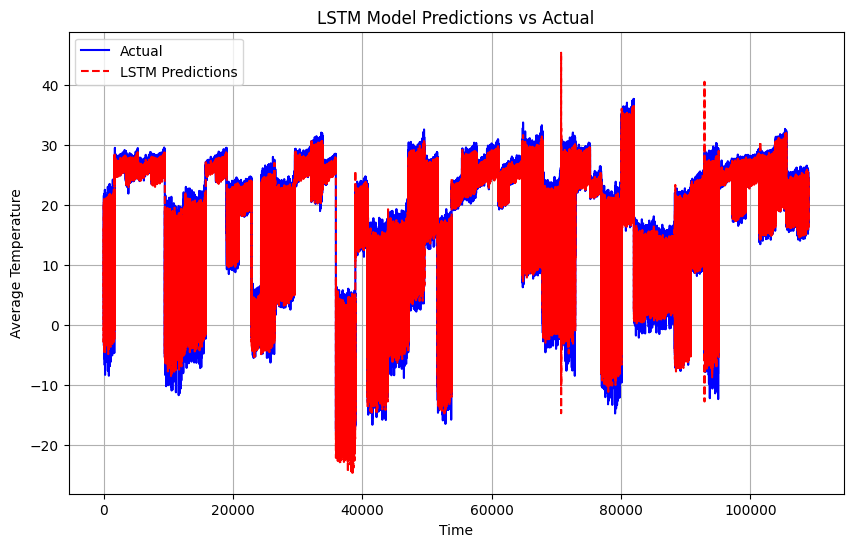

In [25]:
# Make predictions using the LSTM model
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Inverse transform the predictions and actual values to the original scale
y_pred_lstm_inv = scaler.inverse_transform(np.concatenate((y_pred_lstm, X_test_lstm[:, -1, 1].reshape(-1, 1)), axis=1))[:, 0]
y_test_lstm_inv = scaler.inverse_transform(np.concatenate((y_test_lstm.reshape(-1, 1), X_test_lstm[:, -1, 1].reshape(-1, 1)), axis=1))[:, 0]

# Calculate R-squared
r2_lstm = r2_score(y_test_lstm_inv, y_pred_lstm_inv)
print(f"LSTM R-squared: {r2_lstm}")

# Plotting the LSTM predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm_inv, label='Actual', color='blue')
plt.plot(y_pred_lstm_inv, label='LSTM Predictions', color='red', linestyle='--')
plt.title('LSTM Model Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(True)
plt.show()
